In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC, SVC

# 分析者：張鈞傑

# 1. 資料前處理

## 1-1.讀取資料

In [2]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1-2.檢查資料：無缺值

In [3]:
df.notnull().all()

sepal_length    True
sepal_width     True
petal_length    True
petal_width     True
species         True
dtype: bool

## 1-3.觀察資料型態與數據量：
## 1~4 columns are float64 , 5 columns is object , data size = 150 , non-null

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## 1-4. 由於 species 屬於 object 型態，檢查值的內容，代表鳶尾花的三個品種
## ( versicolor 變色鳶尾、virginica 維吉尼亞鳶尾、setosa 山鳶尾 )

In [5]:
df['species'].drop_duplicates().values.tolist()

['setosa', 'versicolor', 'virginica']

<img src="https://www.happycoder.org/images/data-science101/scikit-learn/irises.png" width="100%">

## 1-5. 為了方便後面計算，將 species 欄位的花名轉換為數值
## 將 ['setosa', 'versicolor', 'virginica'] 取代為 [0, 1, 2]

In [6]:
df = df.replace({'setosa':0, 'versicolor':1, 'virginica':2})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 1-6.觀察每個欄位的數值分布：屬於連續型的資料

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# 2. 資料視覺化

## 2-1.觀察結果：petal_length 為雙峰分布 , sepal_width 接近常態分佈 , 三種類的資料各 50筆

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECC90BE7B8>,
      dtype=object)

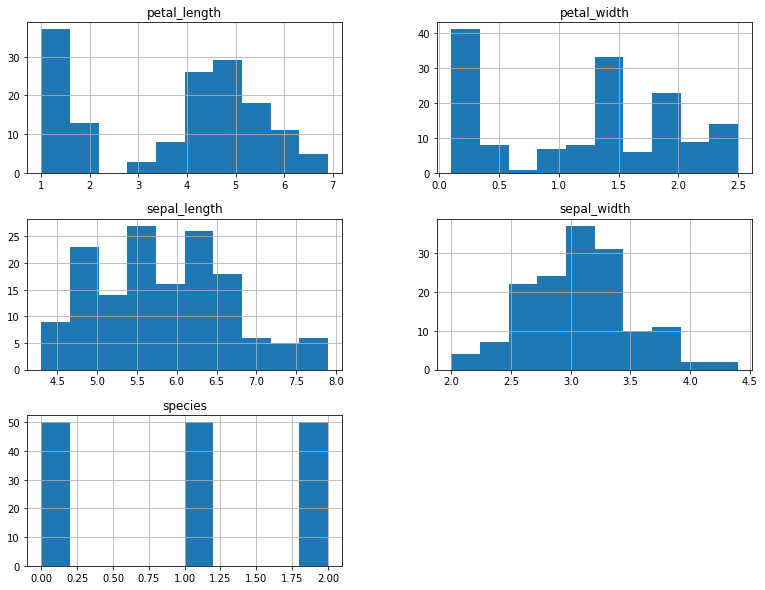

In [8]:
df.hist(figsize=(13,10))

## 2-2.觀察結果：petal_length 與 petal_width 有很接近的分布與波峰

C:\Users\b0011\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\b0011\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\b0011\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\b0011\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in r

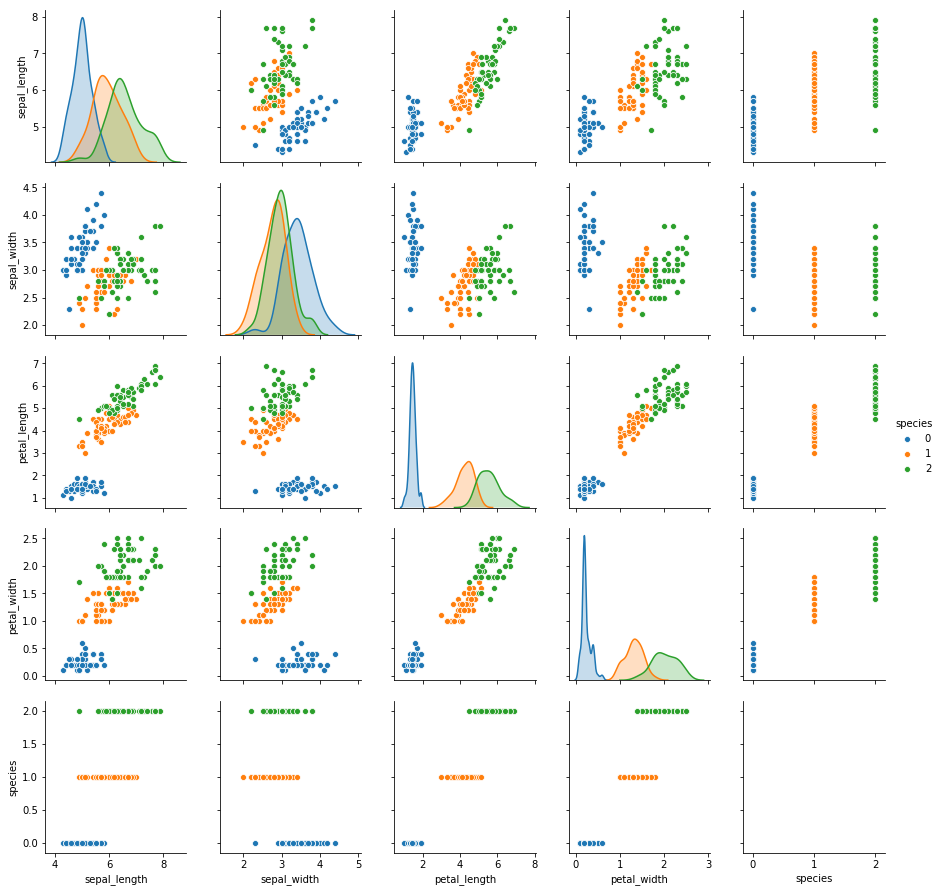

In [9]:
sns.pairplot(hue="species", data=df.iloc[:,:])

## 2-3. 繪製 petal_length 與 petal_width 分布圖，兩者呈現正相關

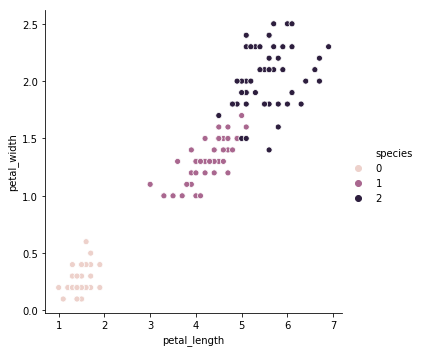

In [10]:
sns.relplot(x="petal_length", y="petal_width", hue="species", data=df)

## 2-4. 繪製相關係數圖：
### 花瓣 petal_length, petal_width,  species 彼此的相關係數高達 0.95以上
### 花萼 sepal_width 則與以上三者呈現很弱的相關性

<img src="https://cdn-images-1.medium.com/max/800/1*JJyUrv3hx8NkSkJnlgVM8w.png" width="30%">

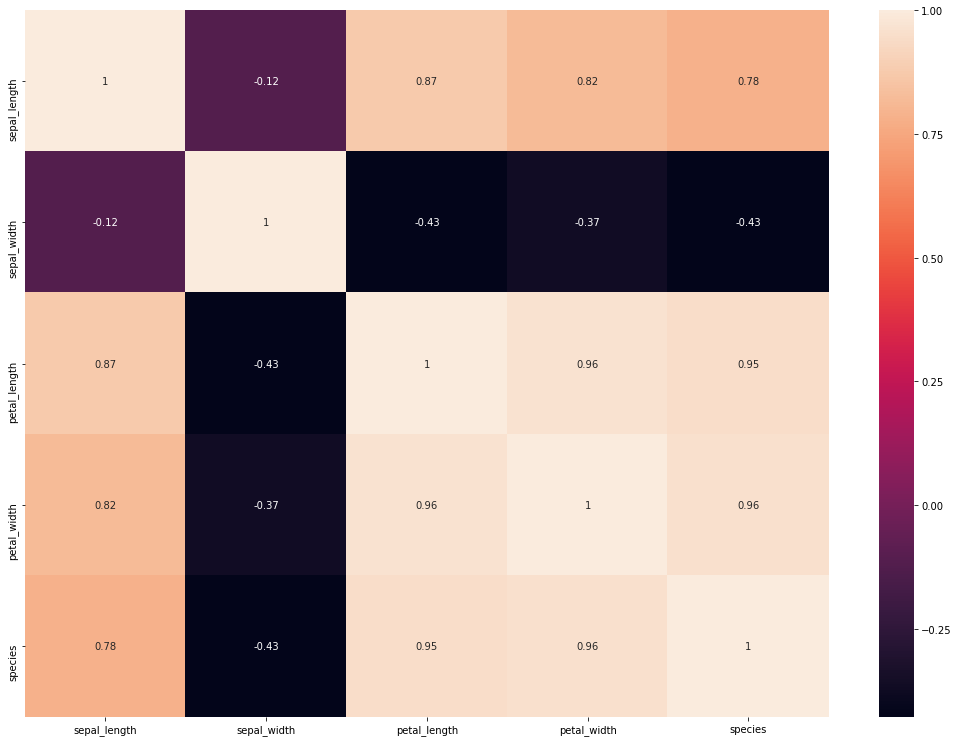

In [11]:
plt.figure(figsize=(18,13))
sns.heatmap(df.corr(), annot=True)

## 2-5. 繪製 3D 分布圖 - 選擇 petal_length, petal_width, sepal_length
### 得到不錯的分群效果

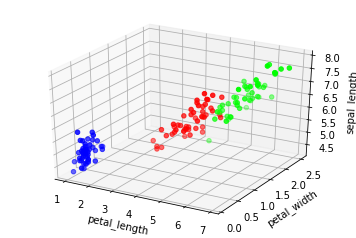

In [12]:
x, y, z = df['petal_length'], df['petal_width'], df['sepal_length']
ax = plt.subplot(111, projection='3d') 
ax.scatter(x, y, z, c=df['species'], cmap="brg")

ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')
ax.set_zlabel('sepal_length') 
plt.show()

# 3. Training 訓練

## 3-1 選擇線性SVC模型
### 範圍：所有欄位的資料
### 得到準確率 0.9666666666666667

In [13]:
X = df.iloc[:, 0:4].values
y = df["species"].values

model = LinearSVC(random_state=555)
model.fit(X=X, y=y)
model.score(X=X, y=y)

0.9666666666666667

## 3-2 將所有欄位組合的資料丟入模型分析
### 發現準確率 0.9666666666666667 已經是最高

In [14]:
y = df["species"].values
for i in range(0,5):
    for j in range(0,5):
        if i == j:
            print(f'df.iloc[:, {i}:{j}] ------')
        elif j - i==0:
            print(f'df.iloc[:, {i}:{j}] ------')
        elif j < i:
            print(f'df.iloc[:, {i}:{j}] ------')
        else:
            X = df.iloc[:, i:j].values
            model.fit(X=X, y=y)
            print(f'df.iloc[:, {i}:{j}] ', model.score(X=X, y=y))

df.iloc[:, 0:0] ------
df.iloc[:, 0:1]  0.64
df.iloc[:, 0:2]  0.8
df.iloc[:, 0:3]  0.96
df.iloc[:, 0:4]  0.9666666666666667
df.iloc[:, 1:0] ------
df.iloc[:, 1:1] ------
df.iloc[:, 1:2]  0.56
df.iloc[:, 1:3]  0.96
df.iloc[:, 1:4]  0.9666666666666667
df.iloc[:, 2:0] ------
df.iloc[:, 2:1] ------
df.iloc[:, 2:2] ------
df.iloc[:, 2:3]  0.9133333333333333
df.iloc[:, 2:4]  0.94
df.iloc[:, 3:0] ------
df.iloc[:, 3:1] ------
df.iloc[:, 3:2] ------
df.iloc[:, 3:3] ------
df.iloc[:, 3:4]  0.9466666666666667
df.iloc[:, 4:0] ------
df.iloc[:, 4:1] ------
df.iloc[:, 4:2] ------
df.iloc[:, 4:3] ------
df.iloc[:, 4:4] ------


In [15]:
y = df["species"].values
for i in range(4):
    NOS = [0,1,2,3]
    NOS.pop(i)
    X = df.iloc[:, NOS].values
    model.fit(X=X, y=y)
    print(f'df.iloc[:, {NOS}] ', model.score(X=X, y=y))

df.iloc[:, [1, 2, 3]]  0.9666666666666667
df.iloc[:, [0, 2, 3]]  0.9466666666666667
df.iloc[:, [0, 1, 3]]  0.9266666666666666
df.iloc[:, [0, 1, 2]]  0.96


In [16]:
y = df["species"].values
NOS = [[0,2],[0,3],[1,3]]
for i in NOS:
    X = df.iloc[:, i].values
    model.fit(X=X, y=y)
    print(f'df.iloc[:, {i}] ', model.score(X=X, y=y))

df.iloc[:, [0, 2]]  0.96
df.iloc[:, [0, 3]]  0.92
df.iloc[:, [1, 3]]  0.9466666666666667


## 3-3 Mean accuracy 平均準確率
### 範圍：所有欄位的資料

In [17]:
X = df.iloc[:, 0:4].values
y = df["species"].values

model = LinearSVC(random_state=555)
model.fit(X=X, y=y)
model.score(X=X, y=y)

0.9666666666666667

## 3-4 Prediction 預測

In [18]:
predict_y = model.predict(X=X)

## 3-5 Confusion matrix 混淆矩陣

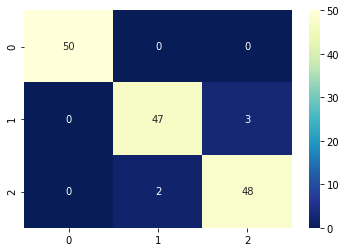

In [19]:
confmat = metrics.confusion_matrix(y, predict_y)
confmat
sns.heatmap(confmat, cmap="YlGnBu_r", annot=True, fmt="d")  

## 3-6 Classification report 分類報告

In [20]:
report = metrics.classification_report(y, predict_y)
print(report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.96      0.94      0.95        50
          2       0.94      0.96      0.95        50

avg / total       0.97      0.97      0.97       150



## 3-7 Accuracy, precision and recall   準確率 和 召回率

In [21]:
print('Accuracy:  ', metrics.accuracy_score(y, predict_y))
print('precision: ', metrics.precision_score(y, predict_y,average='micro'))
print('recall:    ', metrics.recall_score(y, predict_y,average='micro'))

Accuracy:   0.9666666666666667
precision:  0.9666666666666667
recall:     0.9666666666666667


# 4. 特徵工程

In [22]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 4-1 創造新特徵

In [23]:
df['sepal_area'] = df['sepal_length'] * df['sepal_width']
df['petal_area'] = df['petal_length'] * df['petal_width']
df['p/s_length_ratio'] = df['petal_length'] / df['sepal_length']
df['p/s_width_ratio'] = df['petal_width'] / df['sepal_width']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,p/s_length_ratio,p/s_width_ratio
0,5.1,3.5,1.4,0.2,0,17.85,0.28,0.274510,0.057143
1,4.9,3.0,1.4,0.2,0,14.70,0.28,0.285714,0.066667
2,4.7,3.2,1.3,0.2,0,15.04,0.26,0.276596,0.062500
3,4.6,3.1,1.5,0.2,0,14.26,0.30,0.326087,0.064516
4,5.0,3.6,1.4,0.2,0,18.00,0.28,0.280000,0.055556


## 4-2 將 species 移至最後

In [24]:
cols = df.columns.tolist()
cols = cols[:4] + cols[-4:] + [cols[4]]
df = df[cols]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,p/s_length_ratio,p/s_width_ratio,species
0,5.1,3.5,1.4,0.2,17.85,0.28,0.274510,0.057143,0
1,4.9,3.0,1.4,0.2,14.70,0.28,0.285714,0.066667,0
2,4.7,3.2,1.3,0.2,15.04,0.26,0.276596,0.062500,0
3,4.6,3.1,1.5,0.2,14.26,0.30,0.326087,0.064516,0
4,5.0,3.6,1.4,0.2,18.00,0.28,0.280000,0.055556,0


## 4-3 準確率上升一點點

In [25]:
y = df["species"].values
X = df.iloc[:, 0:8].values

model = LinearSVC(random_state=555)
model.fit(X=X, y=y)
model.score(X=X, y=y)

0.9733333333333334

## 4-4 分類僅進步一點點

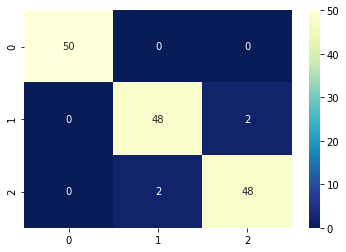

In [26]:
from sklearn import metrics
predict_y = model.predict(X=X)
confmat = metrics.confusion_matrix(y, predict_y)
confmat
sns.heatmap(confmat, cmap="YlGnBu_r", annot=True, fmt="d")  

In [27]:
report = metrics.classification_report(y, predict_y)
print(report)
print('Accuracy:  ', metrics.accuracy_score(y, predict_y))
print('precision: ', metrics.precision_score(y, predict_y,average='micro'))
print('recall:    ', metrics.recall_score(y, predict_y,average='micro'))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.96      0.96      0.96        50
          2       0.96      0.96      0.96        50

avg / total       0.97      0.97      0.97       150

Accuracy:   0.9733333333333334
precision:  0.9733333333333334
recall:     0.9733333333333334


# 5. K-fold 交叉驗證

## 5-1. 選擇特徵

In [28]:
cols = df.columns.tolist()

In [29]:
cols.pop()

'species'

In [30]:
cols

['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'sepal_area',
 'petal_area',
 'p/s_length_ratio',
 'p/s_width_ratio']

In [31]:
selected_features = cols

## 5-2. 採取 5-fold CV，每次的訓練資料約為120筆，足夠訓練好線性模型

In [32]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
model = LinearSVC(random_state=0)

In [33]:
accuracies = []
confmats = []
for train, test in k_fold.split(df["species"]):
    trained = model.fit(df.loc[train, selected_features].values, df.loc[train, "species"].values)
    X_test = df.loc[test, selected_features].values
    y_test = df.loc[test, "species"].values
    accuracies.append(trained.score(X_test, y_test))
    y_pred = model.predict(X_test)
    confmats.append(metrics.confusion_matrix(y_test, y_pred))

## 5-3. 模型準確度

In [34]:
accuracies

[0.9666666666666667, 0.9, 1.0, 1.0, 0.9333333333333333]

## 5-4. 看前三組的 Confusion matrix 混淆矩陣

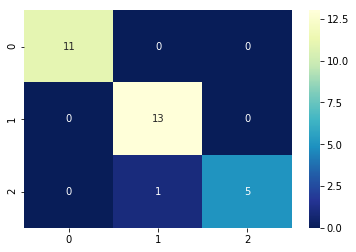

In [35]:
sns.heatmap(confmats[0], cmap="YlGnBu_r", annot=True, fmt="d")

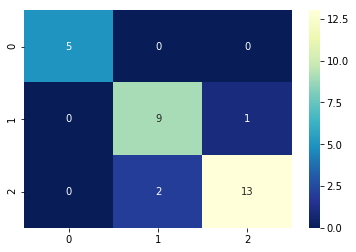

In [36]:
sns.heatmap(confmats[1], cmap="YlGnBu_r", annot=True, fmt="d")

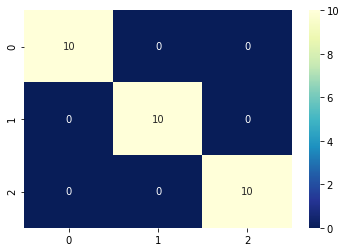

In [37]:
sns.heatmap(confmats[2], cmap="YlGnBu_r", annot=True, fmt="d")

# 結論

以最簡單的線性模型，建立分類模型，把特徵加以組合的方式可以達成近乎完美的分類效果。簡單的模型在預測時期可以非常高效，也避免了 overfitting。